# Using Naïve Bayes for Predictions

## Predicting text classifications

In [1]:
# Load 20 newsgroups dataset if it is not on the local directory
url <- "https://www.cs.umb.edu/~smimarog/textmining/datasets/20ng-train-all-terms.txt"
destfile <- "20ng-train-all-terms.txt"
if(!file.exists(destfile)){download.file(url, destfile, mode="wb")}

In [2]:
# Reading the dataset
newsgroups <- read.table("20ng-train-all-terms.txt", 
                    header=FALSE, sep="\t", 
                    quote="", 
                    stringsAsFactors=FALSE, 
                    col.names = c("topic", "text"))

In [3]:
# Splitting the data frame into train and test sets
set.seed(0)
sample_size <- floor(0.67 * nrow(newsgroups))
train_idx <- sample(seq_len(nrow(newsgroups)), size = sample_size)

txt_train <- newsgroups$text[train_idx]
y_train <- as.factor(newsgroups$topic[train_idx])

txt_test <- newsgroups$text[-train_idx]
y_test <- as.factor(newsgroups$topic[-train_idx])

In [4]:
if (!require("text2vec")) install.packages("text2vec", repos='http://cran.us.r-project.org')
library(text2vec)

Loading required package: text2vec
Warning message:
"package 'text2vec' was built under R version 3.5.3"

In [5]:
# This call shows help information about using itoken.
?itoken

In [6]:
# Tokenizing the words for both train and test sets
it_train = itoken(txt_train,
                  tolower, word_tokenizer,
                  progressbar = TRUE)

vocab = create_vocabulary(it_train)

it_test = itoken(txt_test,
                 tolower, word_tokenizer,
                 progressbar = TRUE)

  |======================================================================| 100%


In [7]:
# Vectorizing both train and test sets using hash vectorizer
vectorizer = hash_vectorizer(hash_size = 2 ^ 14)
X_train = create_dtm(it_train, vectorizer)
X_test = create_dtm(it_test, vectorizer)

  |======================================================================| 100%


In [8]:
if (!require("e1071")) install.packages("e1071", repos='http://cran.us.r-project.org')
library(e1071)

Loading required package: e1071
Warning message:
"package 'e1071' was built under R version 3.5.3"

In [9]:
if (!require("fastNaiveBayes")) {
   require(devtools)
   install_version("fastNaiveBayes", version = "1.1.2", repos = "http://cran.us.r-project.org")
}

#if (!("fastNaiveBayes" %in% rownames(installed.packages()))) {install.packages("fastNaiveBayes")}
library(fastNaiveBayes)

Loading required package: fastNaiveBayes


In [10]:
NB_multinomial <- fastNaiveBayes.multinomial(X_train, y_train, laplace = 1, sparse = TRUE)

In [11]:
train_preds <- predict(NB_multinomial, newdata = X_train)
test_preds <- predict(NB_multinomial, newdata = X_test)

In [12]:
train_accuracy <- mean(train_preds == y_train)
test_accuracy <- mean(test_preds == y_test)

In [13]:
print(paste("Naive Bayes multinomial train accuracy:", round(train_accuracy, 3)))
print(paste("Naive Bayes multinomial test accuracy:", round(test_accuracy, 3)))

[1] "Naive Bayes multinomial train accuracy: 0.314"
[1] "Naive Bayes multinomial test accuracy: 0.256"


## Checking your R library information

You may notice that this example loads the version 1.1.2 `fastNaiveBayes` library using the `install_version()` call, rather than the normal `install.packages()` call. The reason for this change is that the new 2.1.0 version of the `fastNaiveBayes` library is different from the version used for this example (see `https://www.rdocumentation.org/packages/fastNaiveBayes/versions/1.1.2/topics/fastNaiveBayes.multinomial`, as shown at `https://cran.r-project.org/web/packages/fastNaiveBayes/fastNaiveBayes.pdf`. Instead of a `fastNaiveBayes.multinomial()` function, you now have an `fnb.multinomial()` function, so you receive a `function not found` error message. More importantly, this new library works in a completely different manner than the old library, so using the new library isn't an option. The following code shows a method you can use to determine the functions that a package supports so that you can verify that a `function not found` error actually is a problem with the library.

In [14]:
ls("package:fastNaiveBayes") 

[1] "fastNaiveBayes.bernoulli"           "fastNaiveBayes.detect_distribution"
[3] "fastNaiveBayes.gaussian"            "fastNaiveBayes.mixed"              
[5] "fastNaiveBayes.multinomial"         "tweets"                            
[7] "tweetsDTM"

## Getting an overview of Bayesian inference

### Developing a simple inference example

This example uses a different database than the example in the book. In this case, you perform analysis on the Iris dataset, but the principles are the same.

In [15]:
if (!require("MCMCpack")) install.packages("MCMCpack", repos='http://cran.us.r-project.org')
library(MCMCpack)
if (!require("MASS")) install.packages("MASS", repos='http://cran.us.r-project.org')
library(MASS)

Loading required package: MCMCpack
Warning message:
"package 'MCMCpack' was built under R version 3.5.3"Loading required package: coda
Warning message:
"package 'coda' was built under R version 3.5.3"Loading required package: MASS
##
## Markov Chain Monte Carlo Package (MCMCpack)
## Copyright (C) 2003-2019 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park
##
## Support provided by the U.S. National Science Foundation
## (Grants SES-0350646 and SES-0350613)
##


In [16]:
data(iris)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [17]:
freq <- lm(as.numeric(Species) ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, data=iris)
summary(freq)


Call:
lm(formula = as.numeric(Species) ~ Sepal.Length + Sepal.Width + 
    Petal.Length + Petal.Width, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59215 -0.15368  0.01268  0.11089  0.55077 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.18650    0.20484   5.792 4.15e-08 ***
Sepal.Length -0.11191    0.05765  -1.941   0.0542 .  
Sepal.Width  -0.04008    0.05969  -0.671   0.5030    
Petal.Length  0.22865    0.05685   4.022 9.26e-05 ***
Petal.Width   0.60925    0.09446   6.450 1.56e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2191 on 145 degrees of freedom
Multiple R-squared:  0.9304,	Adjusted R-squared:  0.9285 
F-statistic: 484.5 on 4 and 145 DF,  p-value: < 2.2e-16


In [18]:
quantiles <- MCMCregress(as.numeric(Species) ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, data=iris)
summary(quantiles)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                 Mean       SD  Naive SE Time-series SE
(Intercept)   1.18538 0.206918 2.069e-03      1.998e-03
Sepal.Length -0.11138 0.058294 5.829e-04      5.829e-04
Sepal.Width  -0.04027 0.060478 6.048e-04      6.397e-04
Petal.Length  0.22816 0.057331 5.733e-04      5.733e-04
Petal.Width   0.60974 0.095370 9.537e-04      9.537e-04
sigma2        0.04875 0.005833 5.833e-05      5.978e-05

2. Quantiles for each variable:

                 2.5%      25%      50%        75%    97.5%
(Intercept)   0.77743  1.04672  1.18547  1.3244075 1.586649
Sepal.Length -0.22727 -0.15082 -0.11067 -0.0721836 0.001095
Sepal.Width  -0.15863 -0.08112 -0.04035 -0.0001155 0.078274
Petal.Length  0.11611  0.18907  0.22845  0.2672629 0.339776
Petal.Width   0.42368  0.54458  0.61028  0.6739717 0.794600
sigma2        0

The `lm()` output looks similar to the `MCMCregress()` output, but the emphasis of `MCMCregress()` is on the quantiles of the exact posterior for each parameter. The ouptut also includes the `sigma2` value. You can see the posterior draws used to perform the required analysis using the following code.

In [19]:
print(quantiles[1:10,])

      (Intercept) Sepal.Length Sepal.Width Petal.Length Petal.Width     sigma2
 [1,]   1.1141697  -0.12226042 -0.02009312    0.2536605   0.5973027 0.04593268
 [2,]   0.9449311  -0.17575413  0.07795783    0.3390351   0.4659510 0.04318235
 [3,]   1.0804500  -0.16747896  0.07044526    0.2234065   0.7069569 0.05114496
 [4,]   1.6937959  -0.09769822 -0.17414693    0.1597645   0.6982728 0.04552841
 [5,]   1.2294947  -0.06134867 -0.11447441    0.1839655   0.6626164 0.04384671
 [6,]   1.4037677  -0.10626038 -0.09940121    0.1843164   0.6971843 0.05071417
 [7,]   0.7223370  -0.08291352  0.05138457    0.2609828   0.5134203 0.05332422
 [8,]   1.3339398  -0.12645766 -0.06743264    0.2541396   0.5512834 0.04522240
 [9,]   1.1161120  -0.10152978 -0.02288994    0.2323081   0.5828412 0.04661688
[10,]   1.2458327  -0.07911019 -0.09539214    0.1650963   0.7532087 0.05204940


If you want to use the draws to obtain values other than what `summary()` provides, you can perform the task using `apply()` as shown here.

In [20]:
apply(quantiles, 2, quantile, probs=c(0.2, 0.5, 0.8))

,(Intercept),Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,sigma2
20%,1.011525,-0.16088811,-0.090615605,0.1792964,0.5294507,0.04378953
50%,1.185469,-0.11066795,-0.040347612,0.2284523,0.6102802,0.04833700
80%,1.358403,-0.06301278,0.009669043,0.2766569,0.6888852,0.05346757


As with Python, you can use traceplots to see potential issues in your model. The example shows that the data are mixed correctly.

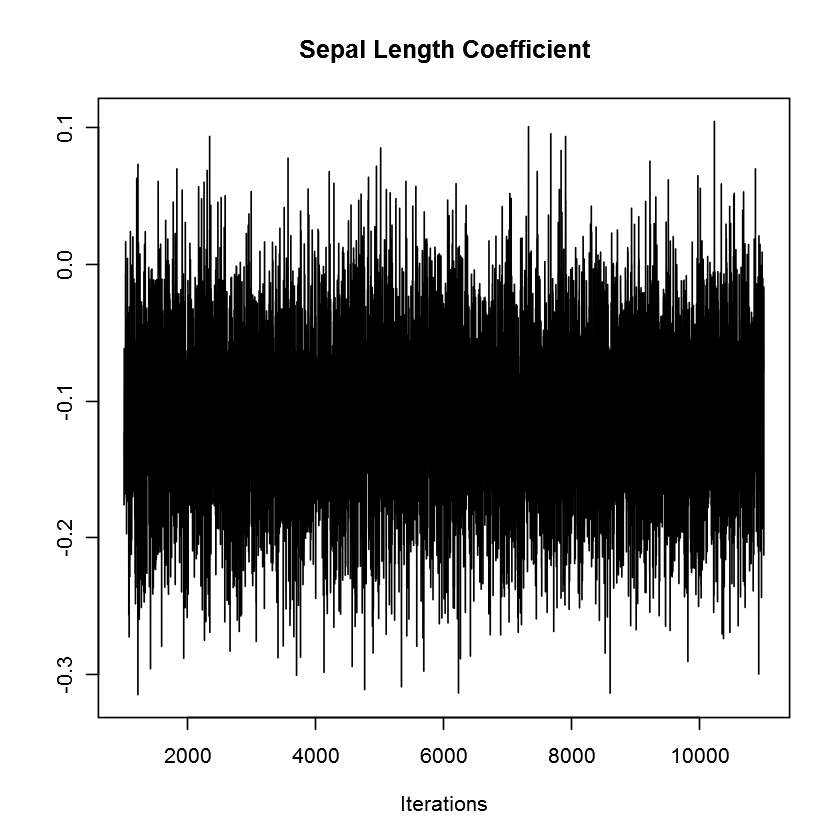

In [21]:
traceplot(quantiles[,"Sepal.Length"], main="Sepal Length Coefficient")

You also have access to density plots, as shown here.

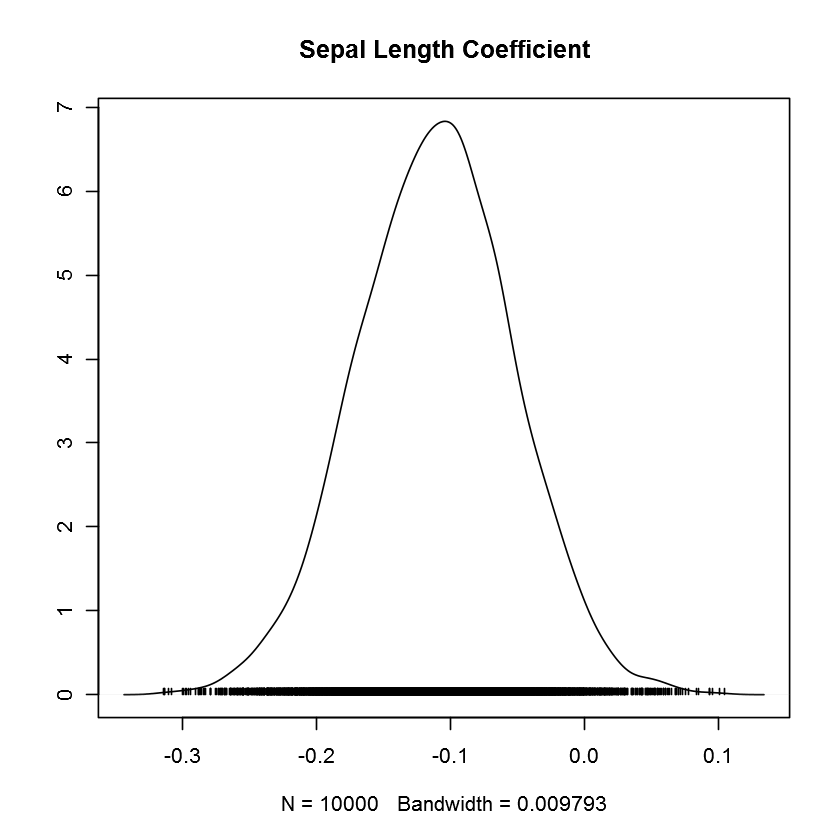

In [22]:
densplot(quantiles[,"Sepal.Length"], main="Sepal Length Coefficient")

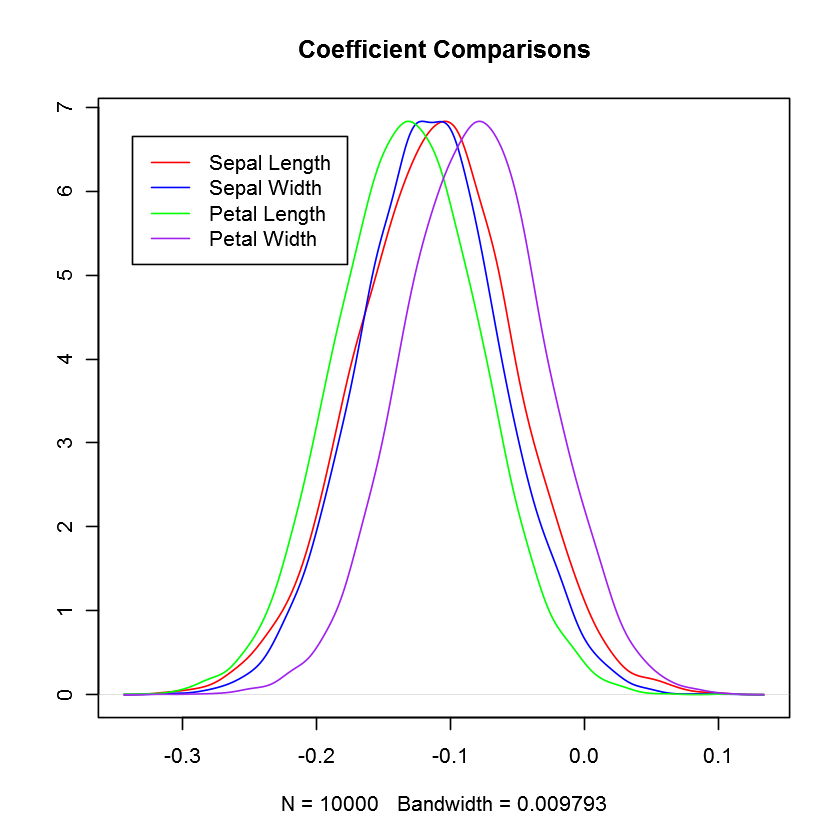

In [23]:
densplot(quantiles[,"Sepal.Length"], col="Red", show.obs=FALSE, main="Coefficient Comparisons")
par(new=TRUE)
densplot(quantiles[,"Sepal.Width"], axes=FALSE, col="Blue", show.obs=FALSE, xlab="")
par(new=TRUE)
densplot(quantiles[,"Petal.Length"], axes=FALSE, col="Green", show.obs=FALSE, xlab="")
par(new=TRUE)
densplot(quantiles[,"Petal.Width"], axes=FALSE, col="Purple", show.obs=FALSE, xlab="")
legend(0.15, 4, 
       legend=c("Sepal Length", "Sepal Width", "Petal Length", "Petal Width"), 
       col=c("Red", "Blue", "Green", "Purple"), lty=c(1, 1, 1, 1))